<a href="https://colab.research.google.com/github/Frank0012/BiasMachine/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
from sklearn import neighbors
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd


In [267]:
n_neighbors = 5

In [268]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [269]:
data = []
for i in range(len(df['YEAR'])):
  if (df['MeasureDesc'][i] == 'Current Smoking'):
    data.append([df['YEAR'][i], df['LocationDesc'][i], df['Gender'][i], df['Race'][i], df['Age'][i], df['Education'][i], df['Data_Value'][i]])
data

[[2011,
  'Alabama',
  'Overall',
  'All Races',
  '65 Years and Older',
  'All Grades',
  10.2],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 25 and Older',
  '> 12th Grade',
  17.5],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 20 and Older',
  '> 12th Grade',
  17.7],
 [2011,
  'Alabama',
  'Overall',
  'African American',
  'All Ages',
  'All Grades',
  20.7],
 [2011, 'Alabama', 'Female', 'All Races', 'All Ages', 'All Grades', 21.0],
 [2011, 'Alabama', 'Overall', 'All Races', 'All Ages', 'All Grades', 24.3],
 [2011,
  'Alabama',
  'Female',
  'All Races',
  '18 to 44 Years',
  'All Grades',
  24.3],
 [2011, 'Alabama', 'Overall', 'White', 'All Ages', 'All Grades', 24.9],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 25 and Older',
  '12th Grade',
  24.9],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  'Age 20 and Older',
  '12th Grade',
  26.0],
 [2011,
  'Alabama',
  'Overall',
  'All Races',
  '45 to 64 Years',
  'All Grades',
  26.2],
 [2011, '

In [270]:
years = []
for i in data:
    if int(i[0]) not in years:
      years.append(int(i[0]))


In [271]:
races = ['White', 'Hispanic', 'American Indian/Alaska Native', 'Asian/Pacific Islander', 'African American'  ]

In [272]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

averages = [[20.683018867924527, 20.069523809523815, 19.685987261146497, 19.312440191387562, 18.90689655172414, 18.642172523961666, 18.39780821917809, 18.154014598540154],
[21.07735849056604, 20.118867924528303, 19.504430379746836, 19.08516746411483, 18.484169884169894, 18.08006430868168, 17.77265193370166, 17.458088235294127],
[33.25, 34.301428571428566, 34.69906542056076, 34.18865248226951, 33.74204545454547, 33.38349056603776, 33.05714285714288, 32.82127659574471],
[13.183783783783783, 11.867123287671232, 11.385849056603767, 11.086805555555552, 10.75027624309392, 10.404109589041092, 10.431640624999996, 10.41909722222222],
[25.592682926829273, 24.096385542168672, 23.495934959349594, 23.04484848484848, 22.81980676328502, 22.323790322580635, 21.984192439862532, 21.544848484848476]]

X = []
for i in averages:
  for j in range(len(years)):
    X.append([years[j], i[j]])
y = []
for t in range(5):
  for k in range(8):
    y.append(t)


X


[[2011, 20.683018867924527],
 [2012, 20.069523809523815],
 [2013, 19.685987261146497],
 [2014, 19.312440191387562],
 [2015, 18.90689655172414],
 [2016, 18.642172523961666],
 [2017, 18.39780821917809],
 [2018, 18.154014598540154],
 [2011, 21.07735849056604],
 [2012, 20.118867924528303],
 [2013, 19.504430379746836],
 [2014, 19.08516746411483],
 [2015, 18.484169884169894],
 [2016, 18.08006430868168],
 [2017, 17.77265193370166],
 [2018, 17.458088235294127],
 [2011, 33.25],
 [2012, 34.301428571428566],
 [2013, 34.69906542056076],
 [2014, 34.18865248226951],
 [2015, 33.74204545454547],
 [2016, 33.38349056603776],
 [2017, 33.05714285714288],
 [2018, 32.82127659574471],
 [2011, 13.183783783783783],
 [2012, 11.867123287671232],
 [2013, 11.385849056603767],
 [2014, 11.086805555555552],
 [2015, 10.75027624309392],
 [2016, 10.404109589041092],
 [2017, 10.431640624999996],
 [2018, 10.41909722222222],
 [2011, 25.592682926829273],
 [2012, 24.096385542168672],
 [2013, 23.495934959349594],
 [2014, 23.0

In [273]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [274]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'green', 'purple'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue', 'darkgreen', 'magenta'])

In [275]:
year_vals = []
perc_vals = []
for i in X:
  year_vals.append(float(i[0]))
  perc_vals.append(float(i[1]))
year_vals = np.asarray(year_vals)
perc_vals = np.asarray(perc_vals)


In [276]:
h = .02 

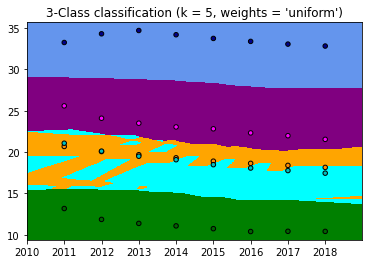

In [277]:
#for weights in ['uniform', 'distance']:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)


x_min = min(year_vals) - 1 
x_max = max(year_vals) + 1 
y_min = min(perc_vals) - 1 
y_max = max(perc_vals) + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(year_vals, perc_vals, c=y, cmap=cmap_bold,
              edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 5, weights = 'uniform')")
         # % (n_neighbors, weights))

plt.show()


In [278]:
print(clf.predict([[2011, 11]]))


[3]


In [279]:
races[3]

'Asian/Pacific Islander'